## Pareto Chart Examples

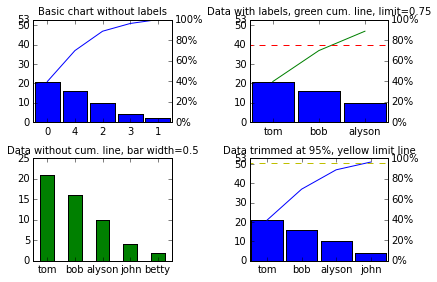

In [4]:
%matplotlib inline
from operator import itemgetter
import matplotlib.pyplot as plt

def pareto(data, labels=[], cumplot=True, axes=None, limit=1.0,
           data_args=(), data_kw={}, line_args=(), line_kw={},
           limit_kw={}):
    """
    Plots a `pareto chart`_ of input categorical data. NOTE: The matplotlib
    command ``show()`` will need to be called separately. The default chart
    uses the following styles:
    
    - bars: 
       - color = blue
       - align = center
       - width = 0.9
    - cumulative line:
       - color = blue
       - linestyle = solid
       - markers = None
    - limit line:
       - color = red
       - linestyle = dashed
    
    Parameters
    ----------
    data : array-like
        The categorical data to be plotted (not necessary to put in descending
        order prior).
        
    Optional
    --------
    labels : list
        A list of strings of the same length as ``data`` that provide labels
        to the categorical data. If none provided, a simple integer value is
        used to label the data, relating to the original order as given. If
        a list is provided, but not the same length as ``data``, then it will
        be treated as if no labels had been input at all.
    cumplot : bool
        If ``True``, a cumulative percentage line plot is included in the chart
        (Default: True) and a second axis indicating the percentage is returned.
    axes : axis object(s)
        If valid matplotlib axis object(s) are given, the chart and cumulative
        line plot of placed on the given axis. Otherwise, a new figure is
        created.
    limit : scalar
        The cumulative percentage value at which the input data should be 
        "chopped off" (should be a value between zero and one).
    data_args : tuple
        Any valid ``matplotlib.pyplot.bar`` non-keyword arguments to apply to
        the bar chart.
    data_kw : dict
        Any valid ``matplotlib.pyplot.bar`` keyword arguments to apply to
        the bar chart.
    line_args : tuple
        Any valid ``matplotlib.pyplot.plot`` non-keyword arguments to apply to
        the cumulative line chart.
    line_kw : dict
        Any valid ``matplotlib.pyplot.plot`` keyword arguments to apply to
        the cumulative line chart.
    limit_kw : dict
        Any valid ``matplotlib.axes.axhline`` keyword arguments to apply to
        the limit line.
        
    Returns
    -------
    fig : matplotlib.figure
        The parent figure object of the chart.
    ax1 : matplotlib.axis
        The axis for the categorical data.
    ax2 : matplotlib.axis
        The axis for the cumulative line plot (not returned if 
        ``cumplot=False``).
    
    Examples
    --------
    
    The following code is the same test code if the ``paretoplot.py`` file is
    run with the command-line call ``$ python paretoplot.py``::

        # plot data using the indices as labels
        data = [21, 2, 10, 4, 16]
        
        # define labels
        labels = ['tom', 'betty', 'alyson', 'john', 'bob']
        
        # create a grid of subplots
        fig,axes = plt.subplots(2, 2)
        
        # plot first with just data
        pareto(data, axes=axes[0, 0])
        plt.title('Basic chart without labels', fontsize=10)
        
        # plot data and associate with labels
        pareto(data, labels, axes=axes[0, 1], limit=0.75, line_args=('g',))
        plt.title('Data with labels, green cum. line, limit=0.75', fontsize=10)
        
        # plot data and labels, but remove lineplot
        pareto(data, labels, cumplot=False, axes=axes[1, 0], 
               data_kw={'width': 0.5, 'color': 'g'})
        plt.title('Data without cum. line, bar width=0.5', fontsize=10)
        
        # plot data cut off at 95%
        pareto(data, labels, limit=0.95, axes=axes[1, 1], limit_kw={'color': 'y'})
        plt.title('Data trimmed at 95%, yellow limit line', fontsize=10)
    
        # format the figure and show
        fig.canvas.set_window_title('Pareto Plot Test Figure')
        plt.show()

    .. _pareto chart: http://en.wikipedia.org/wiki/Pareto_chart
    
    """
    # re-order the data in descending order
    data = list(data)
    n = len(data)
    if n!=len(labels):
        labels = range(n)
    ordered = sorted(zip(data, labels), key=itemgetter(0), reverse=True)
    ordered_data = [dat for dat, lab in ordered]
    ordered_labels = [lab for dat, lab in ordered]
    
    
    
    # allow trimming of data (e.g. 'limit=0.95' keeps top 95%)
    assert 0.0 <= limit <= 1.0, 'limit must be a positive scalar between 0.0 and 1.0'
    
    # create the cumulative line data
    line_data = [0.0]*n
    total_data = float(sum(ordered_data))
    for i, dat in enumerate(ordered_data):
        if i==0:
            line_data[i] = dat/total_data
        else:
            line_data[i] = sum(ordered_data[:i+1])/total_data

    # determine where the data will be trimmed based on the limit
    ltcount = 0
    for ld in line_data:
        if ld<limit:
            ltcount += 1
    limit_loc = range(ltcount+1)
    
    limited_data = [ordered_data[i] for i in limit_loc]
    limited_labels = [ordered_labels[i] for i in limit_loc]
    limited_line = [line_data[i] for i in limit_loc]
    
    # if axes is specified, grab it and focus on its parent figure; otherwise,
    # create a new figure
    if axes:
        plt.sca(axes)
        ax1 = axes
        fig = plt.gcf()
    else:
        fig = plt.gcf()
        ax1 = plt.gca()
    
    # create the second axis
    if cumplot:
        ax2 = ax1.twinx()
    
    # plotting
    if not data_kw.has_key('align'):
        data_kw['align'] = 'center'
    if not data_kw.has_key('width'):
        data_kw['width'] = 0.9
    ax1.bar(limit_loc, limited_data, *data_args, **data_kw)
    if cumplot:
        ax2.plot(limit_loc, [ld*100 for ld in limited_line], *line_args, 
                 **line_kw)
    
    ax1.set_xticks(limit_loc)
    ax1.set_xlim(-0.5,len(limit_loc)-0.5)
    
    # formatting
    if cumplot:
        # since the sum-total value is not likely to be one of the tick marks,
        # let's make it the top-most one, regardless of label closeness
        ax1.set_ylim(0, total_data)
        loc = ax1.get_yticks()
        newloc = [loc[i] for i in range(len(loc)) if loc[i]<=total_data]
        newloc += [total_data]
        ax1.set_yticks(newloc)
        ax2.set_ylim(0, 100)
        if limit<1.0:
            xmin,xmax = ax1.get_xlim()
            if not limit_kw.has_key('linestyle'):
                limit_kw['linestyle'] = '--'
            if not limit_kw.has_key('color'):
                limit_kw['color'] = 'r'
            ax2.axhline(limit*100, xmin-1, xmax-1, **limit_kw)
    
    # set the x-axis labels
    ax1.set_xticklabels(limited_labels)
    
    # adjust the second axis if cumplot=True
    if cumplot:
        yt = [str(int(it))+r'%' for it in ax2.get_yticks()]
        ax2.set_yticklabels(yt)

    if cumplot:
        return fig,ax1,ax2
    else:
        return fig,ax1

# Code to test the functions defined above:

# plot data using the indices as labels
data = [21, 2, 10, 4, 16]
    
# define labels
labels = ['tom', 'betty', 'alyson', 'john', 'bob']
    
# create a grid of subplots
fig,axes = plt.subplots(2, 2)
    
# plot first with just data
pareto(data, axes=axes[0, 0])
plt.title('Basic chart without labels', fontsize=10)
    
# plot data and associate with labels
pareto(data, labels, axes=axes[0, 1], limit=0.75, line_args=('g',))
plt.title('Data with labels, green cum. line, limit=0.75', fontsize=10)
    
# plot data and labels, but remove lineplot
pareto(data, labels, cumplot=False, axes=axes[1, 0], 
           data_kw={'width': 0.5, 'color': 'g'})
plt.title('Data without cum. line, bar width=0.5', fontsize=10)
    
# plot data cut off at 95%
pareto(data, labels, limit=0.95, axes=axes[1, 1], limit_kw={'color': 'y'})
plt.title('Data trimmed at 95%, yellow limit line', fontsize=10)

# format the figure and show
fig.canvas.set_window_title('Pareto Plot Test Figure')
plt.tight_layout()
plt.show()